# V Bond Portfolio Analysis

This notebook provides a comprehensive analysis of the V fund data. The analysis includes:

- Portfolio metadata and composition
- Risk and return characteristics
- Correlation structure analysis
- Sector and credit quality distributions
- Portfolio weights and concentration analysis
- Risk factor decomposition

The data comes from V's real bond portfolio containing 2,629 individual bond positions with comprehensive risk measures including duration vectors, credit spreads, and sector classifications.

## 1. Import Required Libraries

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.join(os.getcwd(), 'current_progress'))

# Import the data loader
from current_progress.v_data_loader import load_v_portfolio_data


# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully")
print(f"Current working directory: {os.getcwd()}")
print(f"Python path includes: {sys.path[-1]}")

Libraries imported successfully
Current working directory: c:\quantum_for_portfolio_optimization
Python path includes: c:\quantum_for_portfolio_optimization\current_progress


## 2. Load V Portfolio Data

Load the bond portfolio data using the v_data_loader module. The function will attempt to load real V data and fall back to synthetic data if the Excel file is not available.

In [2]:
# Load the portfolio data with a reasonable number of assets for analysis
n_assets = 100  # Increase from default for more comprehensive analysis

print("Loading V portfolio data...")
print("=" * 60)

# Change to current_progress directory where the data file should be located
os.chdir('current_progress')
data = load_v_portfolio_data(n_assets=n_assets)
os.chdir('..')  # Return to main directory

print("\nData loaded successfully!")
print(f"Data source: {data['data_source']}")
print(f"Number of assets: {len(data['returns'])}")

# Extract data components for analysis
returns = data['returns']
risks = data['risks']
correlations = data['correlations']
asset_names = data['asset_names']
weights = data['weights']
portfolio_info = data['portfolio_info']
risk_factors = data['risk_factors']
sector_info = data['sector_info']
additional_data = data['additional_data']

print(f"Portfolio Info Keys: {list(portfolio_info.keys())}")
print(f"Risk Factors Keys: {list(risk_factors.keys())}")
print(f"Sector Info Keys: {list(sector_info.keys())}")

Loading V portfolio data...
Loading V bond portfolio data...
Successfully loaded 2629 bond positions from V portfolio
Dataset dimensions: 2629 assets x 278 features
Filtered to 2618 bond positions
Selected top 100 holdings by market value for optimization
  Returns calculated from OAS (credit spreads): 90 bps average
  Risk calculated from duration (avg: 6.01 years) and credit spreads
  Correlation matrix estimated from sector/credit clustering (avg: 0.345)
  Weights calculated from market values (largest: 0.040)

Portfolio Analysis Summary:
  Fund: $8,889,142,283
  Average Duration: 6.01 years
  Average Credit Spread: 90 basis points
  Expected Returns: [0.049, 0.074]
  Risk Measures: [0.038, 0.078]
  Sector Distribution: ['Financial', 'Industrial', 'Treasury Bond Portfolio']

Data loaded successfully!
Data source: v_real
Number of assets: 100
Portfolio Info Keys: ['fund_name', 'n_assets', 'currency', 'total_market_value', 'avg_duration', 'avg_credit_spread', 'avg_coupon', 'credit_qua

## 3. Portfolio Metadata and Summary Statistics

Display comprehensive portfolio information including fund characteristics, size metrics, and key financial indicators.

In [3]:
print("PORTFOLIO OVERVIEW")
print("=" * 50)
print(f"Currency: {portfolio_info.get('currency', 'N/A')}")
print(f"Number of Assets: {portfolio_info.get('n_assets', 'N/A'):,}")
print(f"Total Market Value: ${portfolio_info.get('total_market_value', 0):,.0f}")

print("\nKEY FINANCIAL METRICS")
print("=" * 50)
print(f"Average Duration: {portfolio_info.get('avg_duration', 0):.2f} years")
print(f"Average Credit Spread (OAS): {portfolio_info.get('avg_credit_spread', 0):.0f} basis points")
print(f"Average Coupon: {portfolio_info.get('avg_coupon', 0):.2f}%")
print(f"Largest Single Holding: {portfolio_info.get('largest_holding_pct', 0):.2f}%")

if portfolio_info.get('avg_maturity_years'):
    print(f"Average Maturity: {portfolio_info['avg_maturity_years']:.2f} years")

print("\nSECTOR DISTRIBUTION")
print("=" * 50)
sector_dist = portfolio_info.get('sector_distribution', {})
for sector, count in list(sector_dist.items())[:5]:  # Top 5 sectors
    percentage = (count / sum(sector_dist.values())) * 100
    print(f"{sector}: {count} assets ({percentage:.1f}%)")

print("\nCREDIT QUALITY DISTRIBUTION")
print("=" * 50)
credit_dist = portfolio_info.get('credit_quality_distribution', {})
for quality, count in list(credit_dist.items())[:5]:  # Top 5 credit qualities
    percentage = (count / sum(credit_dist.values())) * 100
    print(f"{quality}: {count} assets ({percentage:.1f}%)")

print("\nRETURN AND RISK OVERVIEW")
print("=" * 50)
print(f"Expected Returns Range: {returns.min():.3f} - {returns.max():.3f}")
print(f"Average Expected Return: {returns.mean():.3f}")
print(f"Risk Range: {risks.min():.3f} - {risks.max():.3f}")
print(f"Average Risk: {risks.mean():.3f}")
print(f"Return/Risk Ratio: {returns.mean() / risks.mean():.2f}")

PORTFOLIO OVERVIEW
Currency: USD
Number of Assets: 100
Total Market Value: $8,889,142,283

KEY FINANCIAL METRICS
Average Duration: 6.01 years
Average Credit Spread (OAS): 90 basis points
Average Coupon: 4.60%
Largest Single Holding: 4.02%
Average Maturity: 8.08 years

SECTOR DISTRIBUTION
Financial: 65 assets (65.0%)
Industrial: 33 assets (33.0%)
Treasury Bond Portfolio: 1 assets (1.0%)
Utilities: 1 assets (1.0%)

CREDIT QUALITY DISTRIBUTION
A: 66 assets (66.0%)
BBB: 30 assets (30.0%)
AAA/AA: 4 assets (4.0%)

RETURN AND RISK OVERVIEW
Expected Returns Range: 0.049 - 0.074
Average Expected Return: 0.060
Risk Range: 0.038 - 0.078
Average Risk: 0.060
Return/Risk Ratio: 1.00


## 4. Asset Returns Analysis

Analyze the distribution of expected returns across the portfolio, identify top and bottom performers, and examine return characteristics.

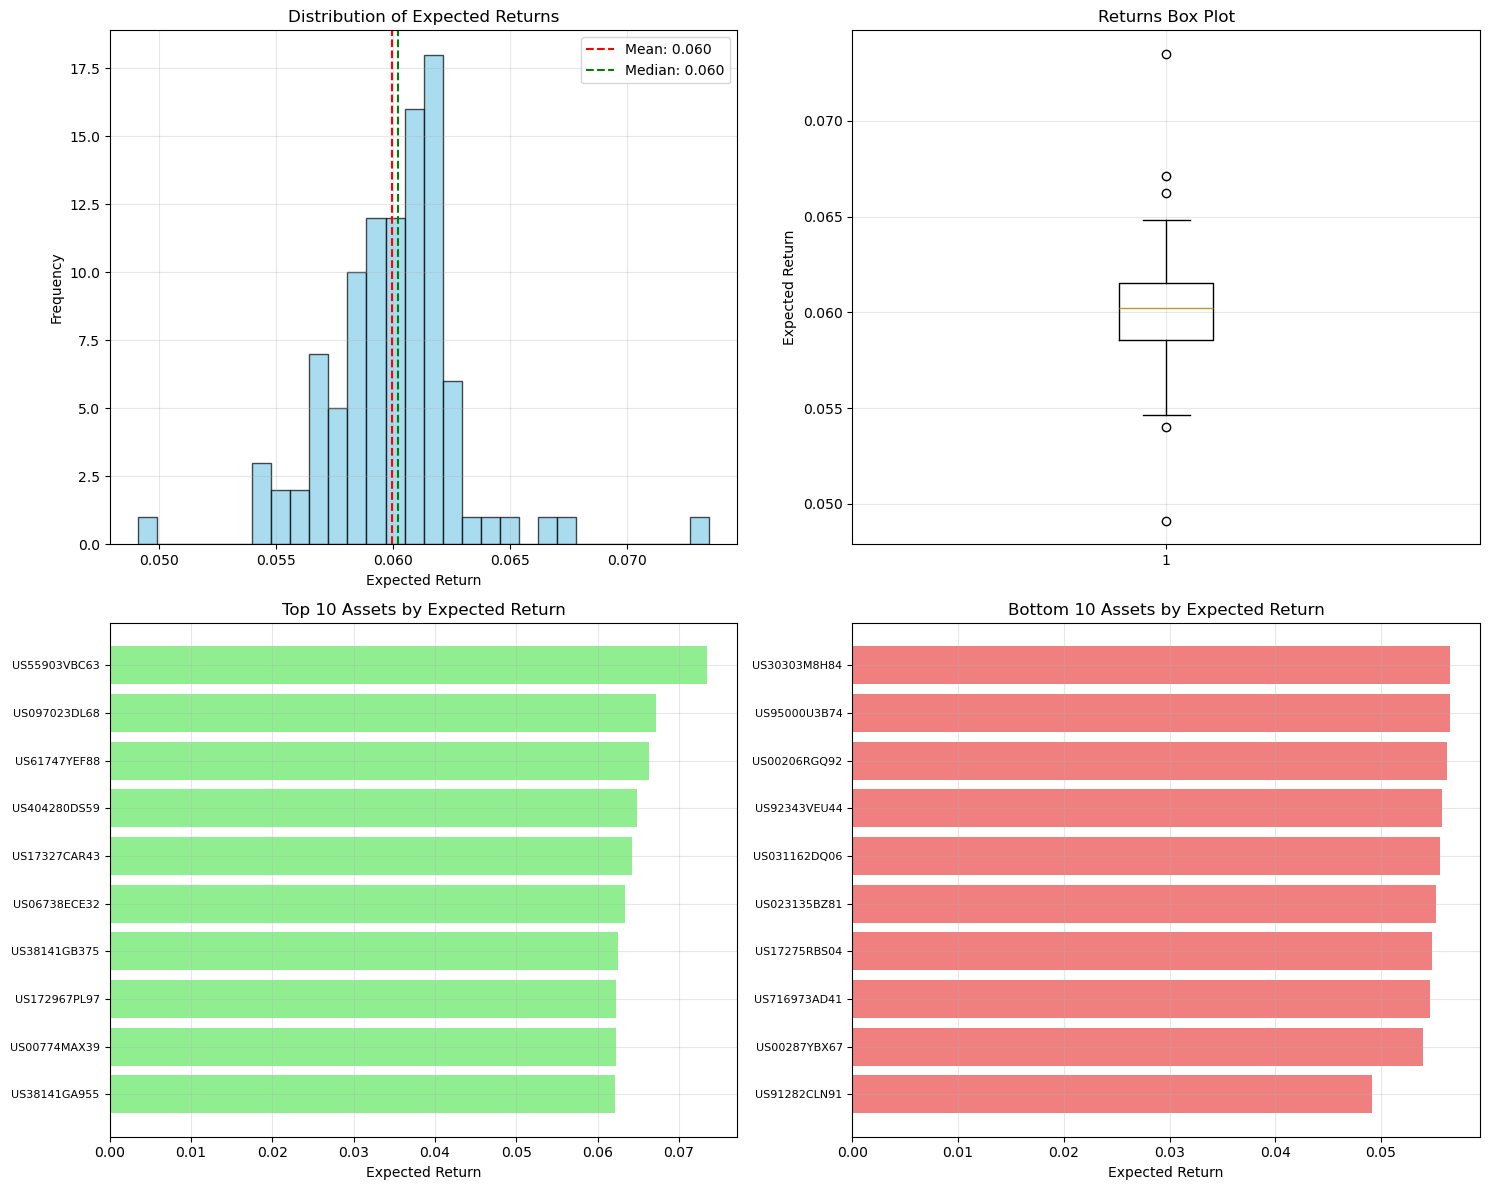

RETURNS SUMMARY STATISTICS
Mean: 0.0600
Median: 0.0602
Standard Deviation: 0.0029
Minimum: 0.0491
Maximum: 0.0735
25th Percentile: 0.0585
75th Percentile: 0.0615
Skewness: -0.0000

TOP 5 PERFORMING ASSETS:
1. US17327CAR43: 0.0643
2. US404280DS59: 0.0648
3. US61747YEF88: 0.0663
4. US097023DL68: 0.0671
5. US55903VBC63: 0.0735

BOTTOM 5 PERFORMING ASSETS:
1. US91282CLN91: 0.0491
2. US00287YBX67: 0.0540
3. US716973AD41: 0.0546
4. US17275RBS04: 0.0548
5. US023135BZ81: 0.0552


In [4]:
# Create subplots for returns analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Returns distribution histogram
axes[0, 0].hist(returns, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(returns.mean(), color='red', linestyle='--', label=f'Mean: {returns.mean():.3f}')
axes[0, 0].axvline(np.median(returns), color='green', linestyle='--', label=f'Median: {np.median(returns):.3f}')
axes[0, 0].set_title('Distribution of Expected Returns')
axes[0, 0].set_xlabel('Expected Return')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Returns box plot
axes[0, 1].boxplot(returns, vert=True)
axes[0, 1].set_title('Returns Box Plot')
axes[0, 1].set_ylabel('Expected Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top 10 highest return assets
top_returns_idx = np.argsort(returns)[-10:]
top_returns_names = [asset_names[i][:15] + '...' if len(asset_names[i]) > 15 else asset_names[i] for i in top_returns_idx]
axes[1, 0].barh(range(len(top_returns_idx)), returns[top_returns_idx], color='lightgreen')
axes[1, 0].set_yticks(range(len(top_returns_idx)))
axes[1, 0].set_yticklabels(top_returns_names, fontsize=8)
axes[1, 0].set_title('Top 10 Assets by Expected Return')
axes[1, 0].set_xlabel('Expected Return')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bottom 10 lowest return assets
bottom_returns_idx = np.argsort(returns)[:10]
bottom_returns_names = [asset_names[i][:15] + '...' if len(asset_names[i]) > 15 else asset_names[i] for i in bottom_returns_idx]
axes[1, 1].barh(range(len(bottom_returns_idx)), returns[bottom_returns_idx], color='lightcoral')
axes[1, 1].set_yticks(range(len(bottom_returns_idx)))
axes[1, 1].set_yticklabels(bottom_returns_names, fontsize=8)
axes[1, 1].set_title('Bottom 10 Assets by Expected Return')
axes[1, 1].set_xlabel('Expected Return')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("RETURNS SUMMARY STATISTICS")
print("=" * 40)
print(f"Mean: {returns.mean():.4f}")
print(f"Median: {np.median(returns):.4f}")
print(f"Standard Deviation: {returns.std():.4f}")
print(f"Minimum: {returns.min():.4f}")
print(f"Maximum: {returns.max():.4f}")
print(f"25th Percentile: {np.percentile(returns, 25):.4f}")
print(f"75th Percentile: {np.percentile(returns, 75):.4f}")
print(f"Skewness: {((returns - returns.mean()) / returns.std()).mean():.4f}")

print(f"\nTOP 5 PERFORMING ASSETS:")
for i, idx in enumerate(np.argsort(returns)[-5:]):
    print(f"{i+1}. {asset_names[idx][:30]}: {returns[idx]:.4f}")

print(f"\nBOTTOM 5 PERFORMING ASSETS:")
for i, idx in enumerate(np.argsort(returns)[:5]):
    print(f"{i+1}. {asset_names[idx][:30]}: {returns[idx]:.4f}")

## 5. Asset Risk Analysis

Examine the risk characteristics of assets in the portfolio, including risk distribution and identification of highest and lowest risk assets.

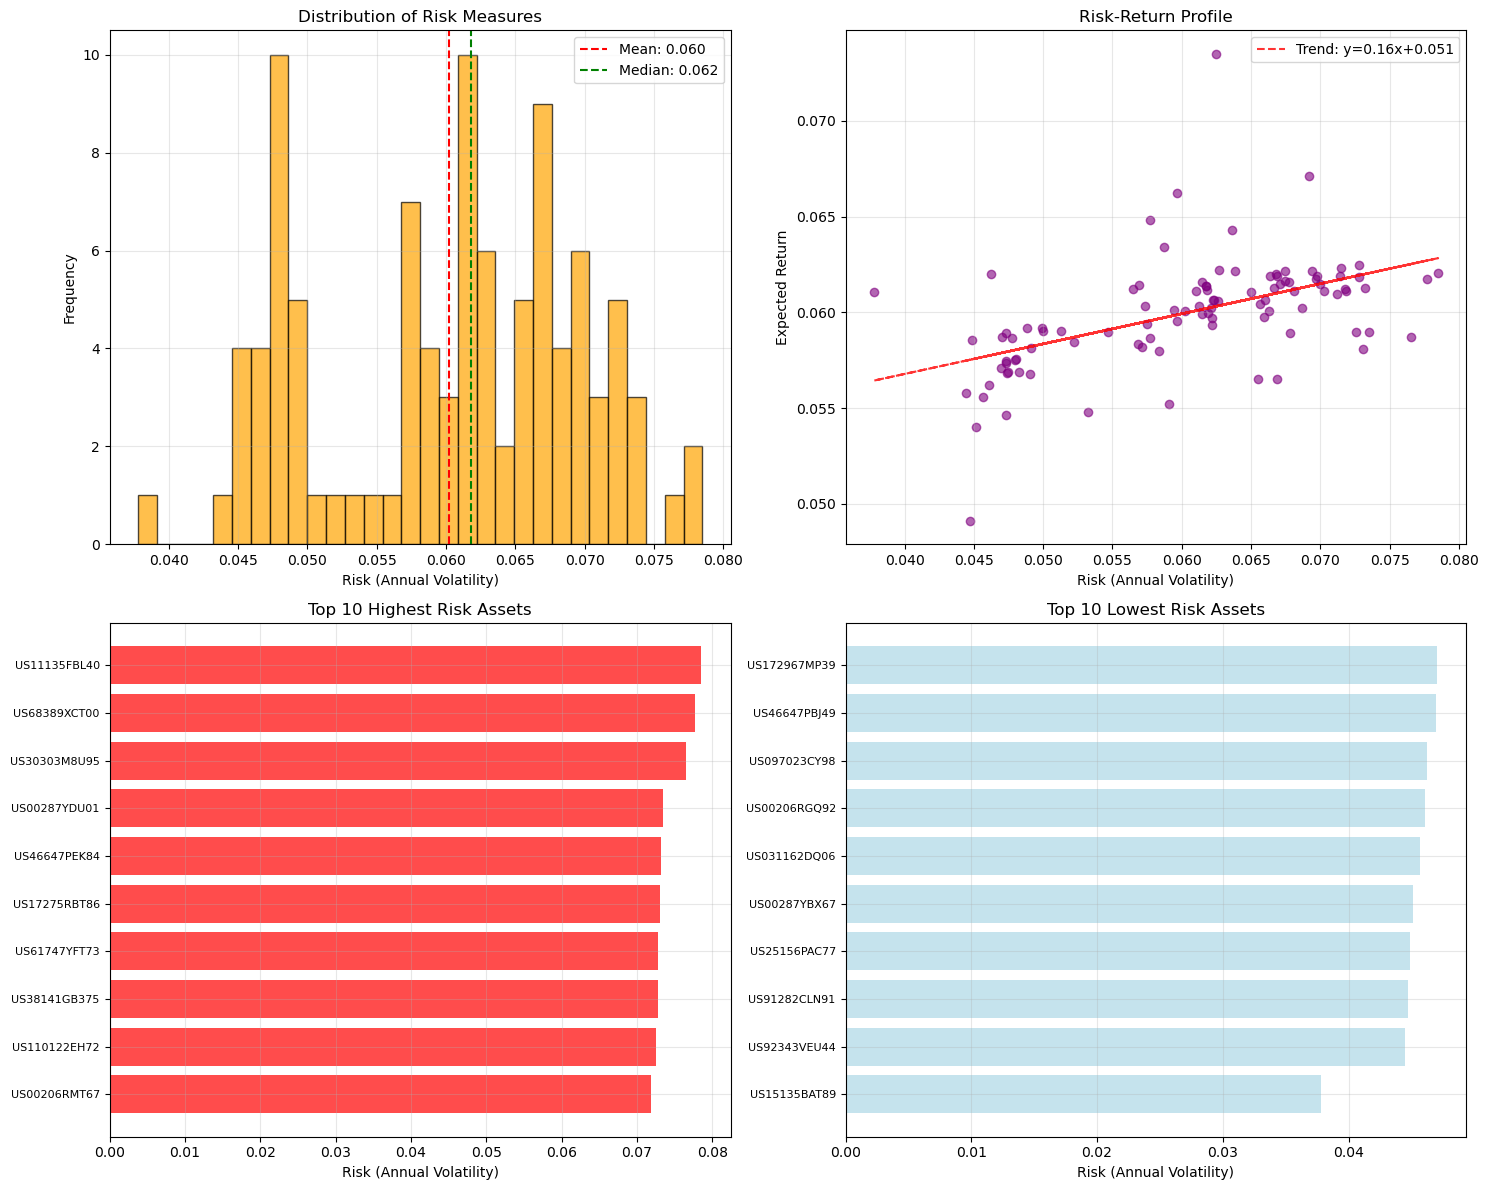

RISK SUMMARY STATISTICS
Mean: 0.0602
Median: 0.0618
Standard Deviation: 0.0094
Minimum: 0.0378
Maximum: 0.0785
25th Percentile: 0.0509
75th Percentile: 0.0675

HIGHEST RISK ASSETS:
1. US46647PEK84: 0.0732
2. US00287YDU01: 0.0735
3. US30303M8U95: 0.0765
4. US68389XCT00: 0.0777
5. US11135FBL40: 0.0785

LOWEST RISK ASSETS:
1. US15135BAT89: 0.0378
2. US92343VEU44: 0.0444
3. US91282CLN91: 0.0447
4. US25156PAC77: 0.0449
5. US00287YBX67: 0.0451

SHARPE RATIO ANALYSIS
Average Sharpe Ratio: 0.251
Best Sharpe Ratio: 0.457
Worst Sharpe Ratio: 0.092

TOP 5 ASSETS BY SHARPE RATIO:
1. US404280DS59: 0.343
2. US61747YEF88: 0.356
3. US097023CY98: 0.368
4. US15135BAT89: 0.426
5. US55903VBC63: 0.457


In [5]:
# Create subplots for risk analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Risk distribution histogram
axes[0, 0].hist(risks, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 0].axvline(risks.mean(), color='red', linestyle='--', label=f'Mean: {risks.mean():.3f}')
axes[0, 0].axvline(np.median(risks), color='green', linestyle='--', label=f'Median: {np.median(risks):.3f}')
axes[0, 0].set_title('Distribution of Risk Measures')
axes[0, 0].set_xlabel('Risk (Annual Volatility)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Risk vs Return scatter plot
axes[0, 1].scatter(risks, returns, alpha=0.6, color='purple')
axes[0, 1].set_title('Risk-Return Profile')
axes[0, 1].set_xlabel('Risk (Annual Volatility)')
axes[0, 1].set_ylabel('Expected Return')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(risks, returns, 1)
p = np.poly1d(z)
axes[0, 1].plot(risks, p(risks), "r--", alpha=0.8, label=f'Trend: y={z[0]:.2f}x+{z[1]:.3f}')
axes[0, 1].legend()

# 3. Top 10 highest risk assets
top_risk_idx = np.argsort(risks)[-10:]
top_risk_names = [asset_names[i][:15] + '...' if len(asset_names[i]) > 15 else asset_names[i] for i in top_risk_idx]
axes[1, 0].barh(range(len(top_risk_idx)), risks[top_risk_idx], color='red', alpha=0.7)
axes[1, 0].set_yticks(range(len(top_risk_idx)))
axes[1, 0].set_yticklabels(top_risk_names, fontsize=8)
axes[1, 0].set_title('Top 10 Highest Risk Assets')
axes[1, 0].set_xlabel('Risk (Annual Volatility)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Bottom 10 lowest risk assets
bottom_risk_idx = np.argsort(risks)[:10]
bottom_risk_names = [asset_names[i][:15] + '...' if len(asset_names[i]) > 15 else asset_names[i] for i in bottom_risk_idx]
axes[1, 1].barh(range(len(bottom_risk_idx)), risks[bottom_risk_idx], color='lightblue', alpha=0.7)
axes[1, 1].set_yticks(range(len(bottom_risk_idx)))
axes[1, 1].set_yticklabels(bottom_risk_names, fontsize=8)
axes[1, 1].set_title('Top 10 Lowest Risk Assets')
axes[1, 1].set_xlabel('Risk (Annual Volatility)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("RISK SUMMARY STATISTICS")
print("=" * 40)
print(f"Mean: {risks.mean():.4f}")
print(f"Median: {np.median(risks):.4f}")
print(f"Standard Deviation: {risks.std():.4f}")
print(f"Minimum: {risks.min():.4f}")
print(f"Maximum: {risks.max():.4f}")
print(f"25th Percentile: {np.percentile(risks, 25):.4f}")
print(f"75th Percentile: {np.percentile(risks, 75):.4f}")

print(f"\nHIGHEST RISK ASSETS:")
for i, idx in enumerate(np.argsort(risks)[-5:]):
    print(f"{i+1}. {asset_names[idx][:30]}: {risks[idx]:.4f}")

print(f"\nLOWEST RISK ASSETS:")
for i, idx in enumerate(np.argsort(risks)[:5]):
    print(f"{i+1}. {asset_names[idx][:30]}: {risks[idx]:.4f}")

# Calculate and display Sharpe ratios (assuming risk-free rate of 4.5%)
risk_free_rate = 0.045
sharpe_ratios = (returns - risk_free_rate) / risks

print(f"\nSHARPE RATIO ANALYSIS")
print("=" * 40)
print(f"Average Sharpe Ratio: {sharpe_ratios.mean():.3f}")
print(f"Best Sharpe Ratio: {sharpe_ratios.max():.3f}")
print(f"Worst Sharpe Ratio: {sharpe_ratios.min():.3f}")

print(f"\nTOP 5 ASSETS BY SHARPE RATIO:")
for i, idx in enumerate(np.argsort(sharpe_ratios)[-5:]):
    print(f"{i+1}. {asset_names[idx][:30]}: {sharpe_ratios[idx]:.3f}")

## 6. Correlation Matrix Analysis

Visualize and analyze the correlation structure of the portfolio assets. Understanding correlations is crucial for portfolio diversification and risk management.

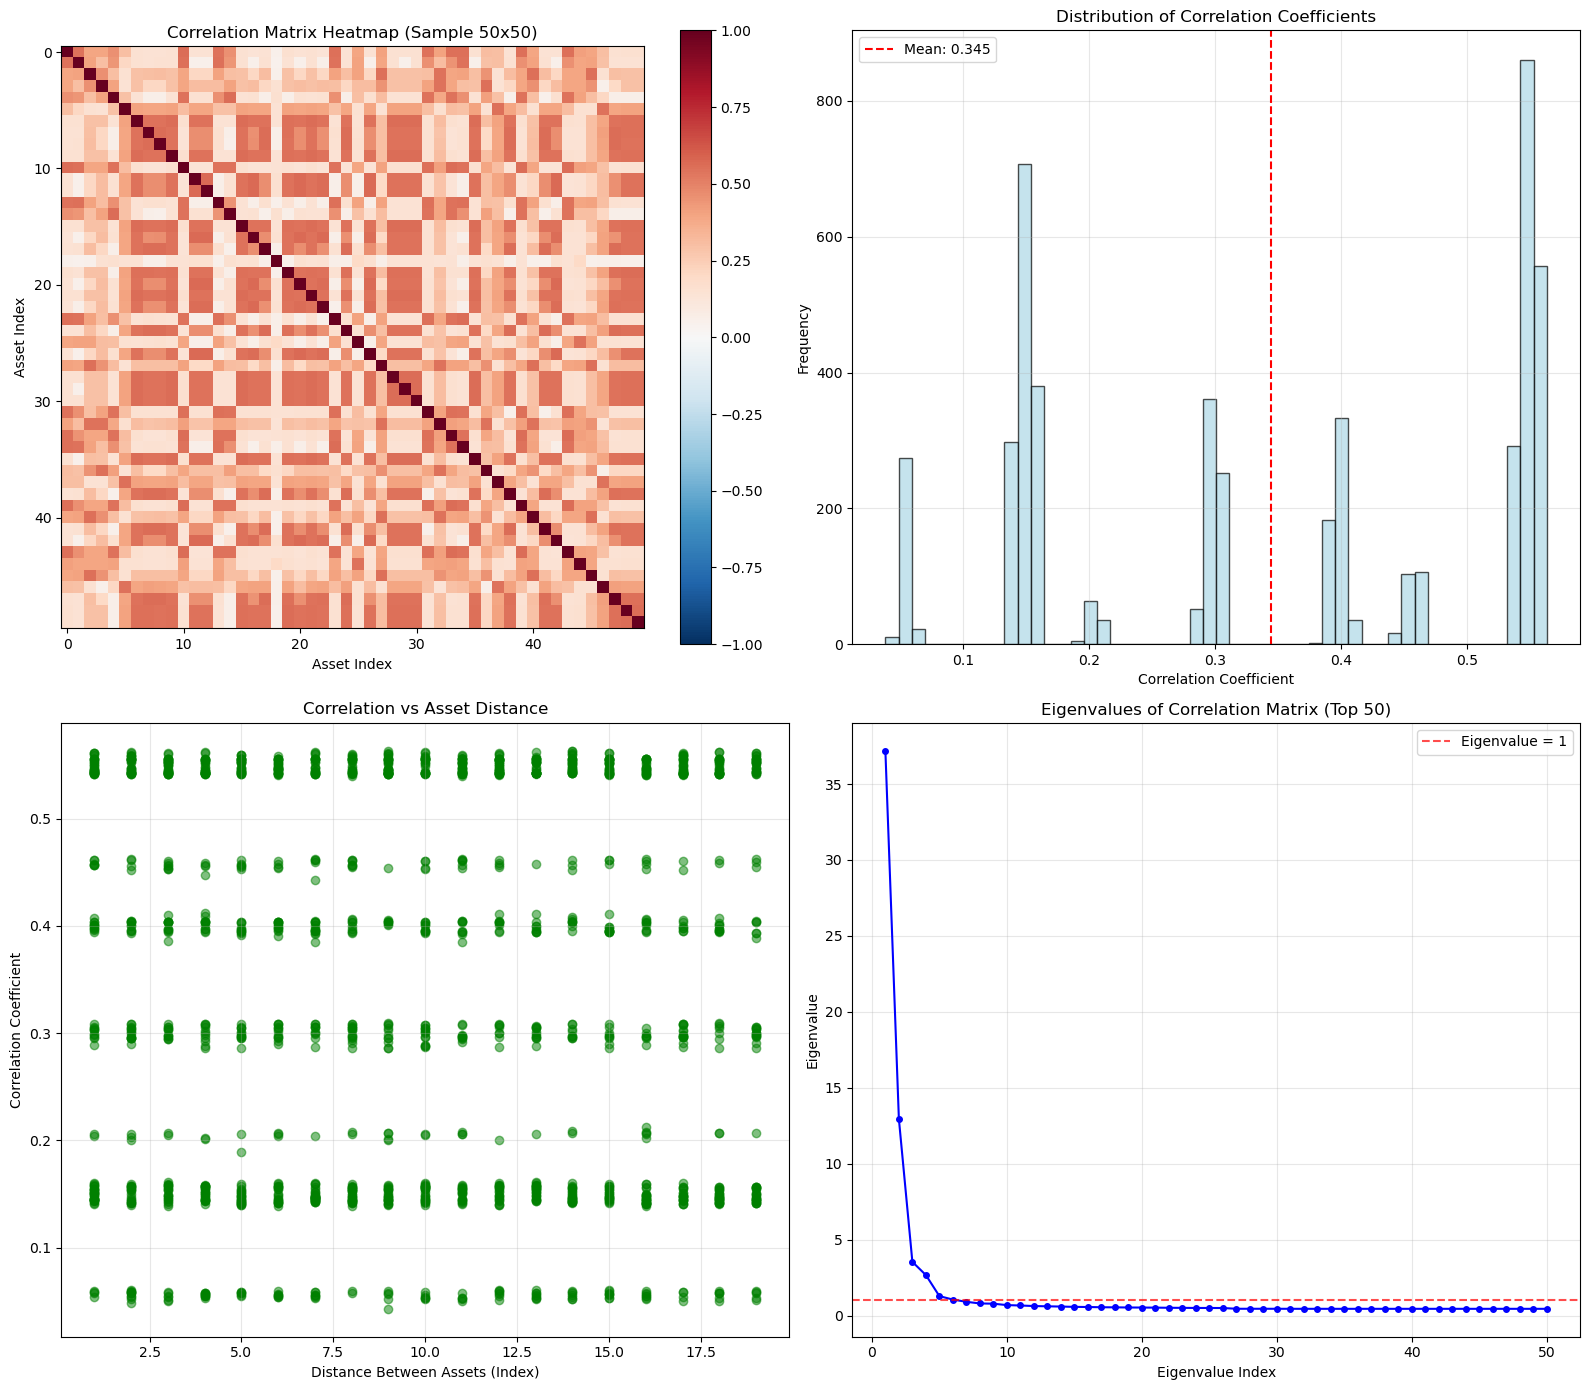

CORRELATION MATRIX STATISTICS
Matrix Dimensions: 100 x 100
Average Correlation: 0.3448
Median Correlation: 0.3894
Standard Deviation: 0.1787
Minimum Correlation: 0.0386
Maximum Correlation: 0.5634

HIGHLY CORRELATED PAIRS (> 0.7): 0

EIGENVALUE ANALYSIS
Largest Eigenvalue: 37.194
Smallest Eigenvalue: -0.000
Condition Number: -517816.7
Number of Eigenvalues > 1: 6
Explained Variance (Top 5): 57.6%


In [6]:
# Create correlation analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 1. Full correlation matrix heatmap (sample for large portfolios)
n_sample = min(50, len(correlations))  # Show max 50x50 for readability
sample_idx = np.random.choice(len(correlations), n_sample, replace=False)
sample_corr = correlations[np.ix_(sample_idx, sample_idx)]

im1 = axes[0, 0].imshow(sample_corr, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0, 0].set_title(f'Correlation Matrix Heatmap (Sample {n_sample}x{n_sample})')
axes[0, 0].set_xlabel('Asset Index')
axes[0, 0].set_ylabel('Asset Index')
plt.colorbar(im1, ax=axes[0, 0])

# 2. Distribution of correlation coefficients
upper_triangle = correlations[np.triu_indices_from(correlations, k=1)]
axes[0, 1].hist(upper_triangle, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 1].axvline(upper_triangle.mean(), color='red', linestyle='--', 
                   label=f'Mean: {upper_triangle.mean():.3f}')
axes[0, 1].set_title('Distribution of Correlation Coefficients')
axes[0, 1].set_xlabel('Correlation Coefficient')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Correlation vs Distance (if we have position indices)
# Create a distance-based correlation analysis
distances = []
correlations_vs_distance = []
for i in range(len(correlations)):
    for j in range(i+1, min(i+20, len(correlations))):  # Check nearby assets
        distance = abs(i - j)
        correlation = correlations[i, j]
        distances.append(distance)
        correlations_vs_distance.append(correlation)

axes[1, 0].scatter(distances, correlations_vs_distance, alpha=0.5, color='green')
axes[1, 0].set_title('Correlation vs Asset Distance')
axes[1, 0].set_xlabel('Distance Between Assets (Index)')
axes[1, 0].set_ylabel('Correlation Coefficient')
axes[1, 0].grid(True, alpha=0.3)

# 4. Eigenvalue analysis of correlation matrix
eigenvalues, eigenvectors = np.linalg.eigh(correlations)
eigenvalues = np.sort(eigenvalues)[::-1]  # Sort in descending order

axes[1, 1].plot(range(1, min(51, len(eigenvalues)+1)), eigenvalues[:50], 'bo-', markersize=4)
axes[1, 1].set_title('Eigenvalues of Correlation Matrix (Top 50)')
axes[1, 1].set_xlabel('Eigenvalue Index')
axes[1, 1].set_ylabel('Eigenvalue')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Eigenvalue = 1')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print correlation statistics
print("CORRELATION MATRIX STATISTICS")
print("=" * 45)
print(f"Matrix Dimensions: {correlations.shape[0]} x {correlations.shape[1]}")
print(f"Average Correlation: {upper_triangle.mean():.4f}")
print(f"Median Correlation: {np.median(upper_triangle):.4f}")
print(f"Standard Deviation: {upper_triangle.std():.4f}")
print(f"Minimum Correlation: {upper_triangle.min():.4f}")
print(f"Maximum Correlation: {upper_triangle.max():.4f}")

# Find highly correlated pairs
high_corr_threshold = 0.7
high_corr_pairs = []
for i in range(len(correlations)):
    for j in range(i+1, len(correlations)):
        if correlations[i, j] > high_corr_threshold:
            high_corr_pairs.append((i, j, correlations[i, j]))

print(f"\nHIGHLY CORRELATED PAIRS (> {high_corr_threshold}): {len(high_corr_pairs)}")
if high_corr_pairs:
    for i, (idx1, idx2, corr) in enumerate(high_corr_pairs[:10]):  # Show top 10
        asset1 = asset_names[idx1][:20] + '...' if len(asset_names[idx1]) > 20 else asset_names[idx1]
        asset2 = asset_names[idx2][:20] + '...' if len(asset_names[idx2]) > 20 else asset_names[idx2]
        print(f"{i+1}. {asset1} - {asset2}: {corr:.3f}")

# Eigenvalue analysis
print(f"\nEIGENVALUE ANALYSIS")
print("=" * 30)
print(f"Largest Eigenvalue: {eigenvalues[0]:.3f}")
print(f"Smallest Eigenvalue: {eigenvalues[-1]:.3f}")
print(f"Condition Number: {eigenvalues[0] / eigenvalues[-1]:.1f}")
print(f"Number of Eigenvalues > 1: {np.sum(eigenvalues > 1)}")
print(f"Explained Variance (Top 5): {eigenvalues[:5].sum() / eigenvalues.sum():.1%}")

# Check if correlation matrix is well-conditioned
if eigenvalues[-1] < 1e-6:
    print("WARNING: Correlation matrix may be ill-conditioned (very small eigenvalues)")
else:
    print("Correlation matrix appears well-conditioned")

## 7. Sector and Credit Quality Distribution

Analyze the portfolio composition by sector and credit quality. These are key factors in bond portfolio diversification and risk assessment.

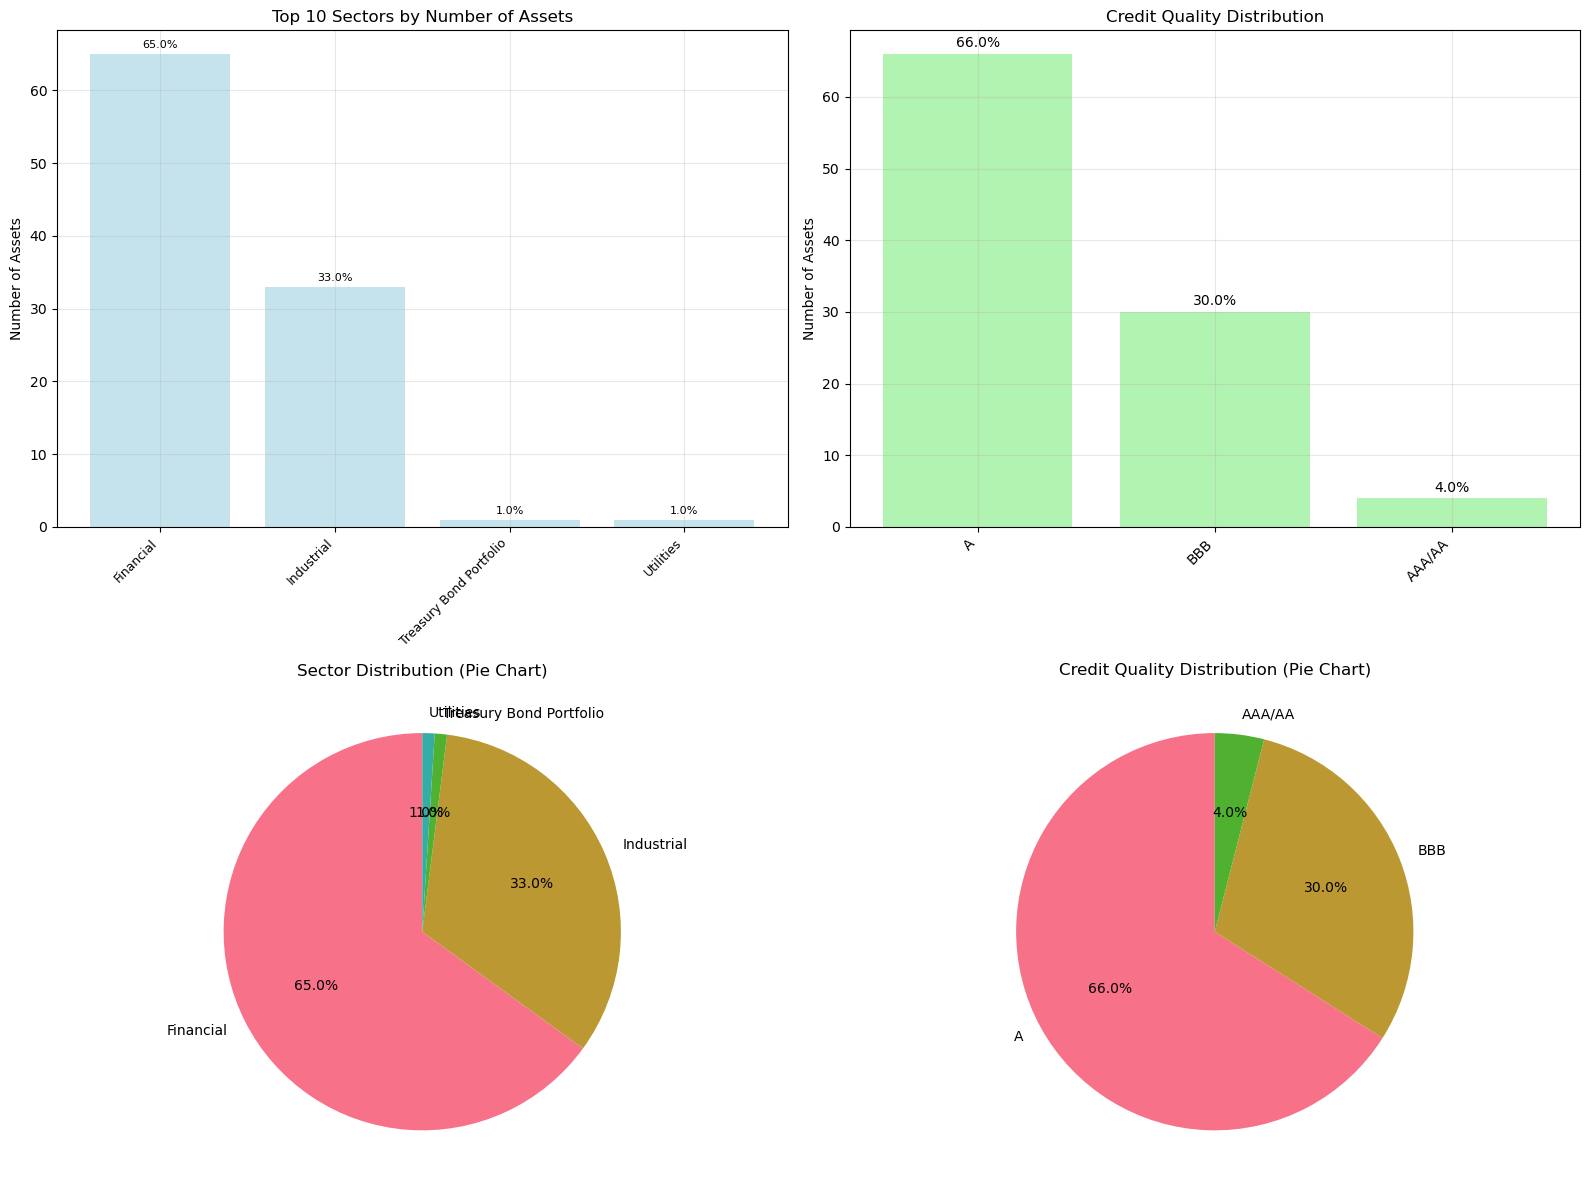

SECTOR ANALYSIS
Total number of unique sectors: 4
Most common sector: Financial (65 assets, 65.0%)

TOP SECTORS:
1. Financial: 65 assets (65.0%)
2. Industrial: 33 assets (33.0%)
3. Treasury Bond Portfolio: 1 assets (1.0%)
4. Utilities: 1 assets (1.0%)

CREDIT QUALITY ANALYSIS
Total number of credit quality buckets: 3
Most common credit quality: A (66 assets, 66.0%)

CREDIT QUALITY BREAKDOWN:
1. A: 66 assets (66.0%)
2. BBB: 30 assets (30.0%)
3. AAA/AA: 4 assets (4.0%)

RETURN/RISK BY TOP SECTORS:
Financial:
  Average Return: 0.0606
  Average Risk: 0.0608
  Sharpe Ratio: 0.256
  Number of Assets: 65
Industrial:
  Average Return: 0.0592
  Average Risk: 0.0599
  Sharpe Ratio: 0.237
  Number of Assets: 33
Treasury Bond Portfolio:
  Average Return: 0.0491
  Average Risk: 0.0447
  Sharpe Ratio: 0.092
  Number of Assets: 1
Utilities:
  Average Return: 0.0587
  Average Risk: 0.0477
  Sharpe Ratio: 0.286
  Number of Assets: 1

RETURN/RISK BY CREDIT QUALITY:
A:
  Average Return: 0.0599
  Average 

In [7]:
# Extract sector and credit quality information
sectors = sector_info['sectors']
credit_qualities = sector_info['credit_qualities']

# Create sector and credit analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Sector distribution
sector_counts = pd.Series(sectors).value_counts()
top_sectors = sector_counts.head(10)  # Top 10 sectors

axes[0, 0].bar(range(len(top_sectors)), top_sectors.values, color='lightblue', alpha=0.7)
axes[0, 0].set_xticks(range(len(top_sectors)))
axes[0, 0].set_xticklabels(top_sectors.index, rotation=45, ha='right', fontsize=9)
axes[0, 0].set_title('Top 10 Sectors by Number of Assets')
axes[0, 0].set_ylabel('Number of Assets')
axes[0, 0].grid(True, alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(top_sectors.values):
    pct = v / len(sectors) * 100
    axes[0, 0].text(i, v + 0.5, f'{pct:.1f}%', ha='center', va='bottom', fontsize=8)

# 2. Credit quality distribution
credit_counts = pd.Series(credit_qualities).value_counts()

axes[0, 1].bar(range(len(credit_counts)), credit_counts.values, color='lightgreen', alpha=0.7)
axes[0, 1].set_xticks(range(len(credit_counts)))
axes[0, 1].set_xticklabels(credit_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Credit Quality Distribution')
axes[0, 1].set_ylabel('Number of Assets')
axes[0, 1].grid(True, alpha=0.3)

# Add percentage labels on bars
for i, v in enumerate(credit_counts.values):
    pct = v / len(credit_qualities) * 100
    axes[0, 1].text(i, v + 0.5, f'{pct:.1f}%', ha='center', va='bottom')

# 3. Sector pie chart (top 8 sectors, others combined)
top_8_sectors = sector_counts.head(8)
others_count = sector_counts.iloc[8:].sum() if len(sector_counts) > 8 else 0

if others_count > 0:
    pie_data = list(top_8_sectors.values) + [others_count]
    pie_labels = list(top_8_sectors.index) + ['Others']
else:
    pie_data = top_8_sectors.values
    pie_labels = top_8_sectors.index

axes[1, 0].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Sector Distribution (Pie Chart)')

# 4. Credit quality pie chart
axes[1, 1].pie(credit_counts.values, labels=credit_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Credit Quality Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

# Print detailed sector analysis
print("SECTOR ANALYSIS")
print("=" * 40)
print(f"Total number of unique sectors: {len(sector_counts)}")
print(f"Most common sector: {sector_counts.index[0]} ({sector_counts.iloc[0]} assets, {sector_counts.iloc[0]/len(sectors)*100:.1f}%)")

print("\nTOP SECTORS:")
for i, (sector, count) in enumerate(sector_counts.head(5).items()):
    pct = count / len(sectors) * 100
    print(f"{i+1}. {sector}: {count} assets ({pct:.1f}%)")

# Print detailed credit quality analysis
print(f"\nCREDIT QUALITY ANALYSIS")
print("=" * 40)
print(f"Total number of credit quality buckets: {len(credit_counts)}")
print(f"Most common credit quality: {credit_counts.index[0]} ({credit_counts.iloc[0]} assets, {credit_counts.iloc[0]/len(credit_qualities)*100:.1f}%)")

print("\nCREDIT QUALITY BREAKDOWN:")
for i, (quality, count) in enumerate(credit_counts.items()):
    pct = count / len(credit_qualities) * 100
    print(f"{i+1}. {quality}: {count} assets ({pct:.1f}%)")

# Analyze return/risk by sector
if len(sector_counts) > 1:
    print(f"\nRETURN/RISK BY TOP SECTORS:")
    print("=" * 40)
    for sector in sector_counts.head(5).index:
        sector_mask = pd.Series(sectors) == sector
        sector_returns = returns[sector_mask]
        sector_risks = risks[sector_mask]
        
        if len(sector_returns) > 0:
            print(f"{sector}:")
            print(f"  Average Return: {sector_returns.mean():.4f}")
            print(f"  Average Risk: {sector_risks.mean():.4f}")
            print(f"  Sharpe Ratio: {(sector_returns.mean() - 0.045) / sector_risks.mean():.3f}")
            print(f"  Number of Assets: {len(sector_returns)}")

# Analyze return/risk by credit quality
if len(credit_counts) > 1:
    print(f"\nRETURN/RISK BY CREDIT QUALITY:")
    print("=" * 40)
    for quality in credit_counts.index:
        quality_mask = pd.Series(credit_qualities) == quality
        quality_returns = returns[quality_mask]
        quality_risks = risks[quality_mask]
        
        if len(quality_returns) > 0:
            print(f"{quality}:")
            print(f"  Average Return: {quality_returns.mean():.4f}")
            print(f"  Average Risk: {quality_risks.mean():.4f}")
            print(f"  Sharpe Ratio: {(quality_returns.mean() - 0.045) / quality_risks.mean():.3f}")
            print(f"  Number of Assets: {len(quality_returns)}")

## 8. Portfolio Weights Analysis

Examine the current portfolio allocation, concentration levels, and weight distribution across assets.

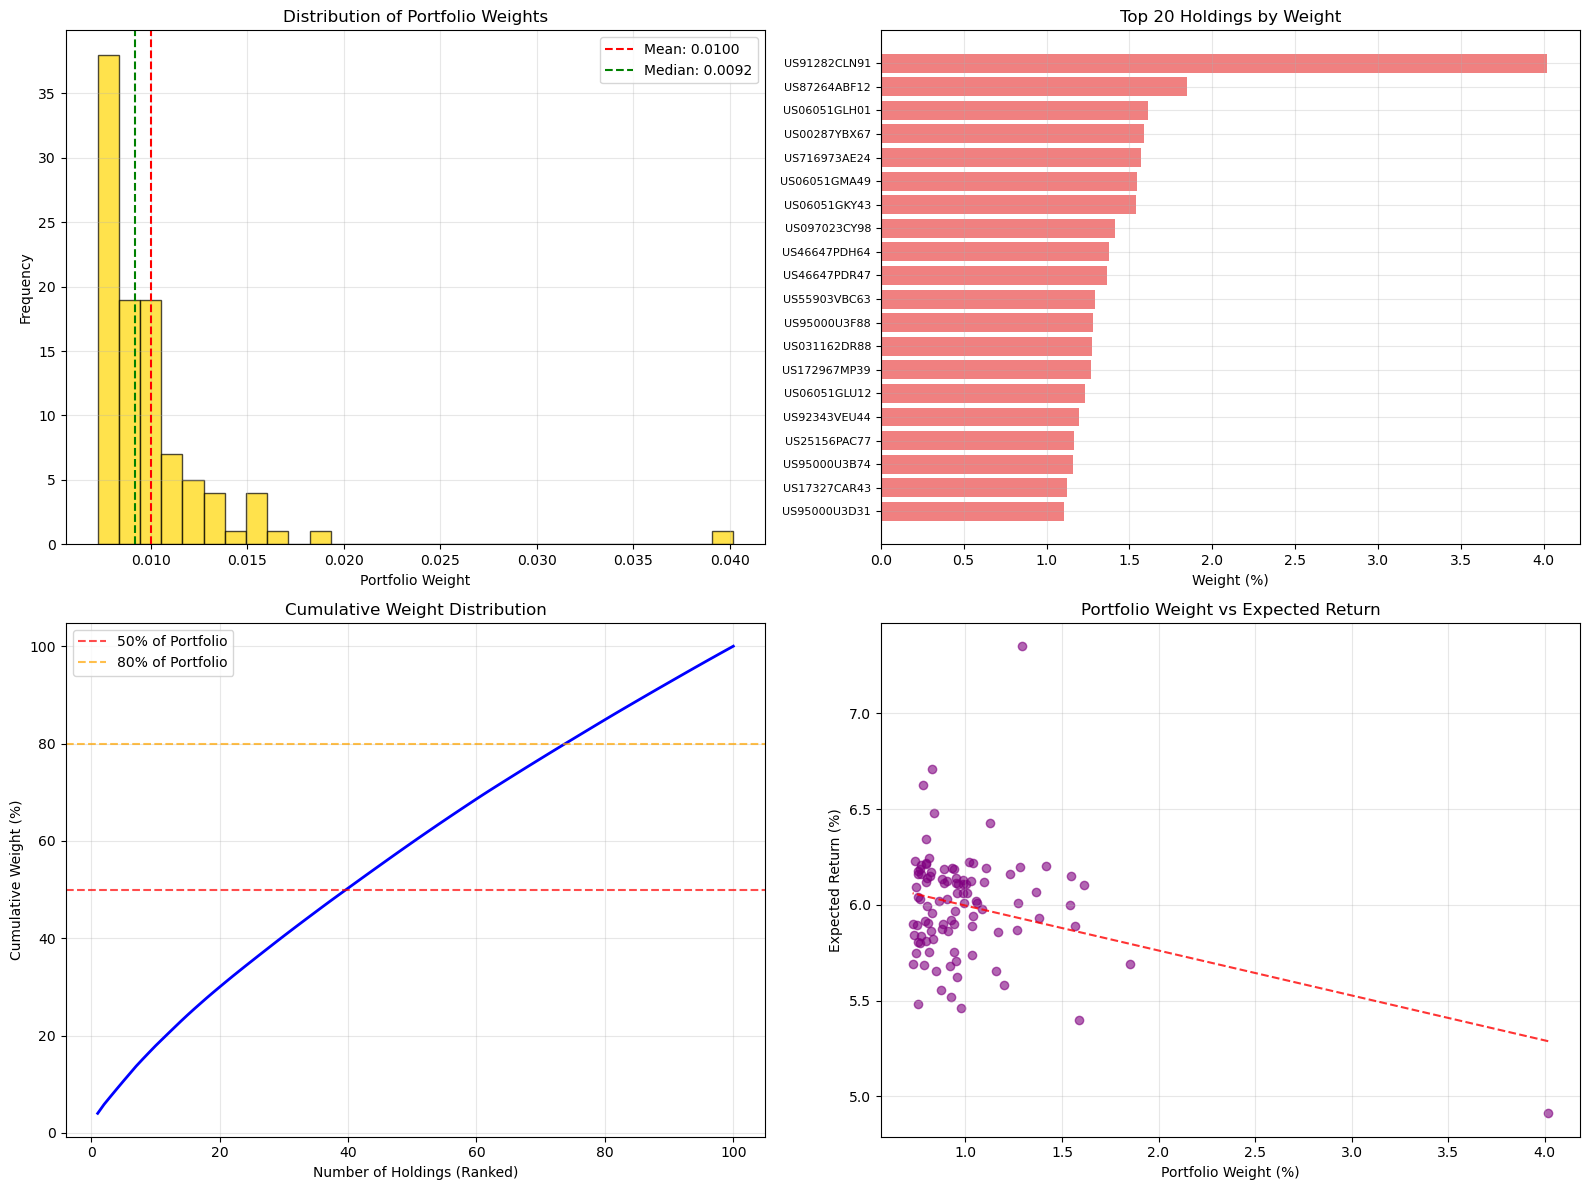

PORTFOLIO CONCENTRATION ANALYSIS
Total number of holdings: 100
Largest holding weight: 0.0402 (4.02%)
Smallest holding weight: 0.0073 (0.73%)
Average weight: 0.0100 (1.00%)
Median weight: 0.0092 (0.92%)

CONCENTRATION RATIOS:
Top 5 holdings: 0.1064 (10.64%)
Top 10 holdings: 0.1788 (17.88%)
Top 20 holdings: 0.2999 (29.99%)

Herfindahl-Hirschman Index: 0.011450
Effective number of holdings: 87.3
Portfolio diversification level: Moderately diversified

HOLDINGS FOR CONCENTRATION LEVELS:
Number of holdings for 50% of portfolio: 40
Number of holdings for 80% of portfolio: 74

TOP 10 HOLDINGS:
1. US46647PDR47: 1.364%
2. US46647PDH64: 1.378%
3. US097023CY98: 1.415%
4. US06051GKY43: 1.542%
5. US06051GMA49: 1.546%
6. US716973AE24: 1.569%
7. US00287YBX67: 1.590%
8. US06051GLH01: 1.613%
9. US87264ABF12: 1.851%
10. US91282CLN91: 4.018%


In [8]:
# Portfolio weights analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of portfolio weights
axes[0, 0].hist(weights, bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[0, 0].axvline(weights.mean(), color='red', linestyle='--', label=f'Mean: {weights.mean():.4f}')
axes[0, 0].axvline(np.median(weights), color='green', linestyle='--', label=f'Median: {np.median(weights):.4f}')
axes[0, 0].set_title('Distribution of Portfolio Weights')
axes[0, 0].set_xlabel('Portfolio Weight')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Top 20 holdings by weight
top_weights_idx = np.argsort(weights)[-20:]
top_weights_names = [asset_names[i][:15] + '...' if len(asset_names[i]) > 15 else asset_names[i] for i in top_weights_idx]

axes[0, 1].barh(range(len(top_weights_idx)), weights[top_weights_idx] * 100, color='lightcoral')
axes[0, 1].set_yticks(range(len(top_weights_idx)))
axes[0, 1].set_yticklabels(top_weights_names, fontsize=8)
axes[0, 1].set_title('Top 20 Holdings by Weight')
axes[0, 1].set_xlabel('Weight (%)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative weight distribution
sorted_weights = np.sort(weights)[::-1]
cumulative_weights = np.cumsum(sorted_weights)

axes[1, 0].plot(range(1, len(cumulative_weights) + 1), cumulative_weights * 100, 'b-', linewidth=2)
axes[1, 0].axhline(y=50, color='r', linestyle='--', alpha=0.7, label='50% of Portfolio')
axes[1, 0].axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% of Portfolio')
axes[1, 0].set_title('Cumulative Weight Distribution')
axes[1, 0].set_xlabel('Number of Holdings (Ranked)')
axes[1, 0].set_ylabel('Cumulative Weight (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Weight vs Return scatter plot
axes[1, 1].scatter(weights * 100, returns * 100, alpha=0.6, color='purple')
axes[1, 1].set_title('Portfolio Weight vs Expected Return')
axes[1, 1].set_xlabel('Portfolio Weight (%)')
axes[1, 1].set_ylabel('Expected Return (%)')
axes[1, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(weights, returns, 1)
p = np.poly1d(z)
axes[1, 1].plot(weights * 100, p(weights) * 100, "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Calculate concentration metrics
print("PORTFOLIO CONCENTRATION ANALYSIS")
print("=" * 45)
print(f"Total number of holdings: {len(weights)}")
print(f"Largest holding weight: {weights.max():.4f} ({weights.max()*100:.2f}%)")
print(f"Smallest holding weight: {weights.min():.4f} ({weights.min()*100:.2f}%)")
print(f"Average weight: {weights.mean():.4f} ({weights.mean()*100:.2f}%)")
print(f"Median weight: {np.median(weights):.4f} ({np.median(weights)*100:.2f}%)")

# Calculate concentration ratios
top_5_weight = np.sum(np.sort(weights)[-5:])
top_10_weight = np.sum(np.sort(weights)[-10:])
top_20_weight = np.sum(np.sort(weights)[-20:])

print(f"\nCONCENTRATION RATIOS:")
print(f"Top 5 holdings: {top_5_weight:.4f} ({top_5_weight*100:.2f}%)")
print(f"Top 10 holdings: {top_10_weight:.4f} ({top_10_weight*100:.2f}%)")
print(f"Top 20 holdings: {top_20_weight:.4f} ({top_20_weight*100:.2f}%)")

# Calculate Herfindahl-Hirschman Index (HHI)
hhi = np.sum(weights**2)
print(f"\nHerfindahl-Hirschman Index: {hhi:.6f}")
print(f"Effective number of holdings: {1/hhi:.1f}")

# Determine portfolio diversification level
if hhi < 0.01:
    diversification = "Highly diversified"
elif hhi < 0.18:
    diversification = "Moderately diversified"
else:
    diversification = "Concentrated"

print(f"Portfolio diversification level: {diversification}")

# Find how many holdings needed for X% of portfolio
holdings_for_50pct = np.where(cumulative_weights >= 0.5)[0][0] + 1
holdings_for_80pct = np.where(cumulative_weights >= 0.8)[0][0] + 1

print(f"\nHOLDINGS FOR CONCENTRATION LEVELS:")
print(f"Number of holdings for 50% of portfolio: {holdings_for_50pct}")
print(f"Number of holdings for 80% of portfolio: {holdings_for_80pct}")

# Top holdings details
print(f"\nTOP 10 HOLDINGS:")
for i, idx in enumerate(np.argsort(weights)[-10:]):
    print(f"{i+1}. {asset_names[idx][:40]}: {weights[idx]*100:.3f}%")

## 9. Risk Factor Decomposition

Analyze the detailed risk factors including Key Rate Duration (KRD) exposures and credit spread characteristics across different maturity buckets.

RISK FACTOR ANALYSIS
Available risk factors: ['krd10y', 'krd15y', 'krd20y', 'krd25y', 'krd30y', 'krd1y', 'krd2y', 'krd3m', 'krd3y', 'krd40y', 'krd50y', 'krd5y', 'krd7y', 'credit_spreads', 'durations']


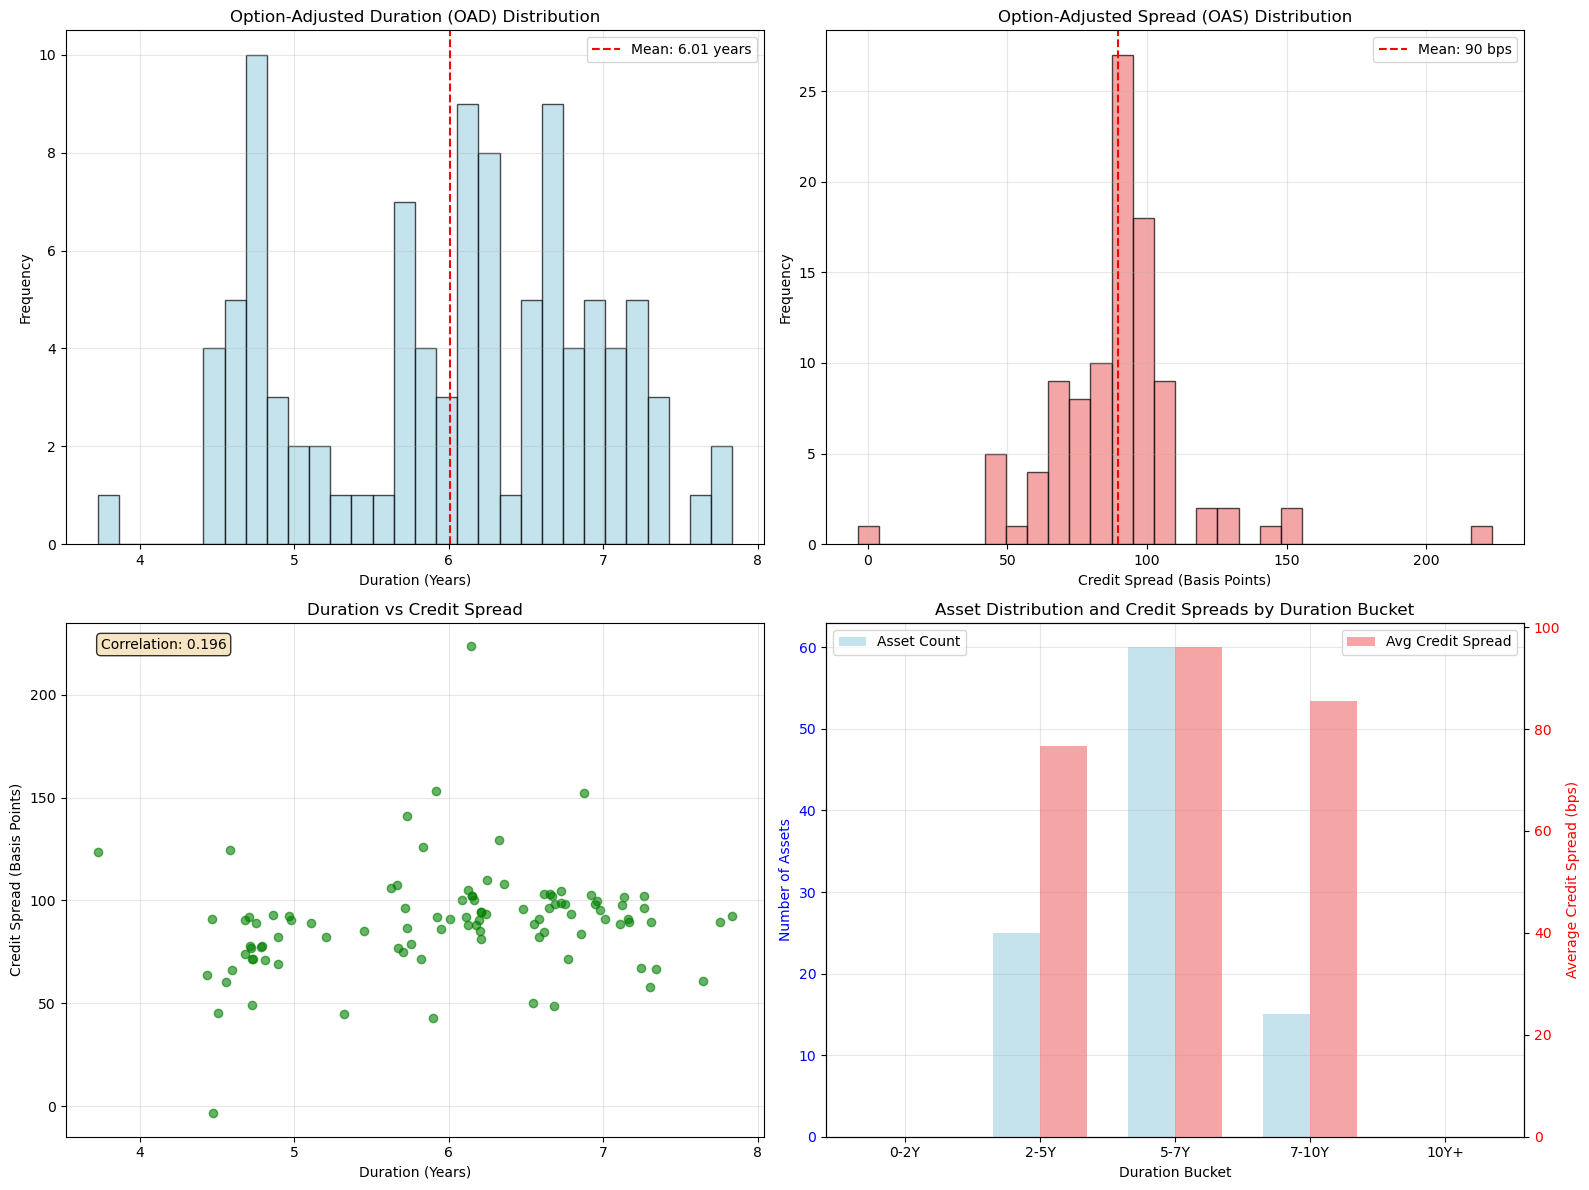

DURATION RISK ANALYSIS
Average Duration: 6.01 years
Duration Range: 3.73 - 7.84 years
Duration Standard Deviation: 0.94 years

CREDIT SPREAD ANALYSIS
Average Credit Spread: 90 basis points
Credit Spread Range: -4 - 224 bps
Credit Spread Standard Deviation: 26 bps

DURATION BUCKET ANALYSIS
2-5Y: 25 assets, Avg Spread: 77 bps, Avg Return: 0.057
5-7Y: 60 assets, Avg Spread: 96 bps, Avg Return: 0.061
7-10Y: 15 assets, Avg Spread: 85 bps, Avg Return: 0.061

KEY RATE DURATION (KRD) ANALYSIS
Available KRD buckets: 13


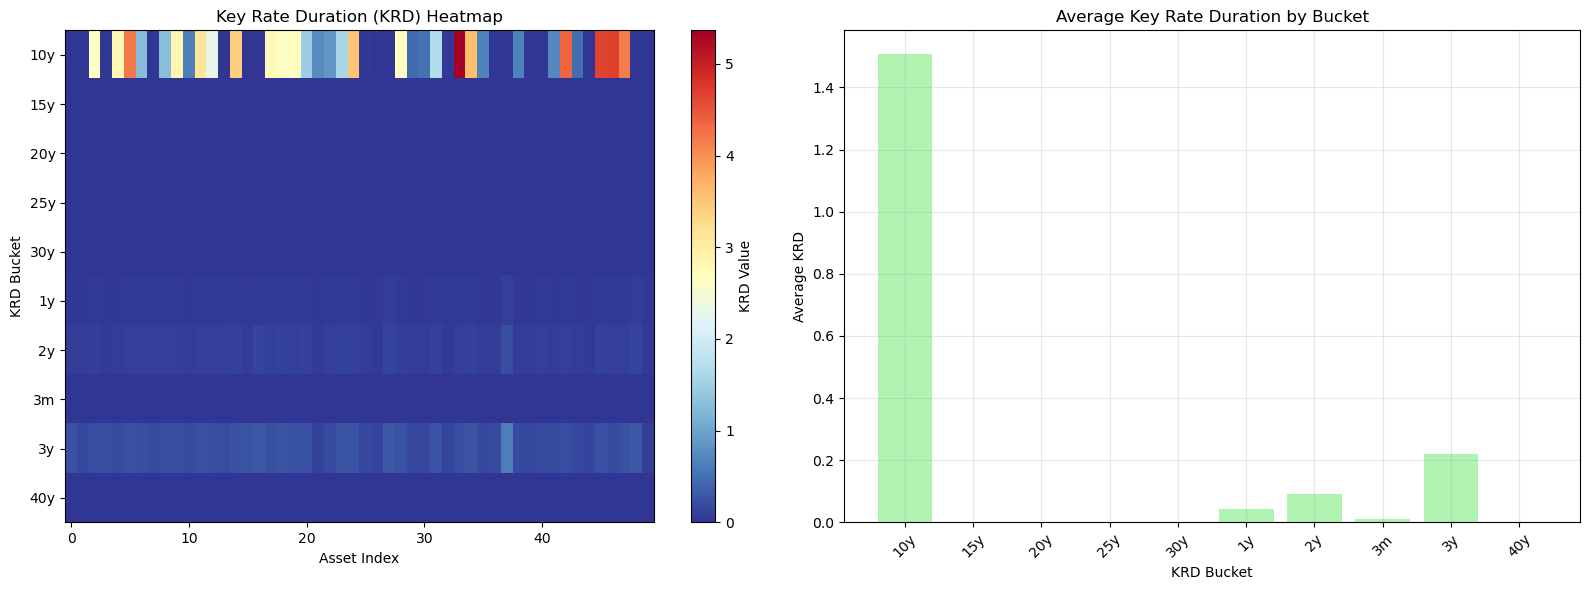

KRD BUCKET ANALYSIS:
10y: 1.508
15y: 0.001
20y: 0.000
25y: 0.000
30y: 0.000
1y: 0.045
2y: 0.091
3m: 0.010
3y: 0.220
40y: 0.000

PORTFOLIO-LEVEL RISK METRICS
Portfolio-Weighted Average Duration: 5.94 years
Portfolio-Weighted Average Credit Spread: 87 bps

TOP 5 DURATION CONTRIBUTORS:
1. US06051GKY43: 0.095 years (1.6%)
2. US06051GLH01: 0.105 years (1.8%)
3. US716973AE24: 0.106 years (1.8%)
4. US06051GMA49: 0.108 years (1.8%)
5. US91282CLN91: 0.180 years (3.0%)


In [9]:
# Risk factor analysis
print("RISK FACTOR ANALYSIS")
print("=" * 50)
print(f"Available risk factors: {list(risk_factors.keys())}")

# Extract duration and credit spread data
durations = risk_factors.get('durations', np.array([]))
credit_spreads = risk_factors.get('credit_spreads', np.array([]))

if len(durations) > 0 and len(credit_spreads) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Duration distribution
    axes[0, 0].hist(durations, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 0].axvline(durations.mean(), color='red', linestyle='--', 
                       label=f'Mean: {durations.mean():.2f} years')
    axes[0, 0].set_title('Option-Adjusted Duration (OAD) Distribution')
    axes[0, 0].set_xlabel('Duration (Years)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Credit spread distribution
    axes[0, 1].hist(credit_spreads, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].axvline(credit_spreads.mean(), color='red', linestyle='--', 
                       label=f'Mean: {credit_spreads.mean():.0f} bps')
    axes[0, 1].set_title('Option-Adjusted Spread (OAS) Distribution')
    axes[0, 1].set_xlabel('Credit Spread (Basis Points)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Duration vs Credit Spread scatter
    axes[1, 0].scatter(durations, credit_spreads, alpha=0.6, color='green')
    axes[1, 0].set_title('Duration vs Credit Spread')
    axes[1, 0].set_xlabel('Duration (Years)')
    axes[1, 0].set_ylabel('Credit Spread (Basis Points)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add correlation coefficient
    corr_coef = np.corrcoef(durations, credit_spreads)[0, 1]
    axes[1, 0].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', 
                    transform=axes[1, 0].transAxes, fontsize=10, 
                    bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # 4. Risk decomposition by duration buckets
    duration_buckets = ['0-2Y', '2-5Y', '5-7Y', '7-10Y', '10Y+']
    bucket_counts = []
    bucket_avg_spread = []
    bucket_avg_return = []
    
    for i, (low, high) in enumerate([(0, 2), (2, 5), (5, 7), (7, 10), (10, 50)]):
        mask = (durations >= low) & (durations < high)
        count = np.sum(mask)
        avg_spread = credit_spreads[mask].mean() if count > 0 else 0
        avg_return = returns[mask].mean() if count > 0 else 0
        
        bucket_counts.append(count)
        bucket_avg_spread.append(avg_spread)
        bucket_avg_return.append(avg_return)
    
    x_pos = np.arange(len(duration_buckets))
    width = 0.35
    
    ax1 = axes[1, 1]
    bars1 = ax1.bar(x_pos - width/2, bucket_counts, width, label='Asset Count', color='lightblue', alpha=0.7)
    ax1.set_xlabel('Duration Bucket')
    ax1.set_ylabel('Number of Assets', color='blue')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(duration_buckets)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x_pos + width/2, bucket_avg_spread, width, label='Avg Credit Spread', color='lightcoral', alpha=0.7)
    ax2.set_ylabel('Average Credit Spread (bps)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax1.set_title('Asset Distribution and Credit Spreads by Duration Bucket')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print duration statistics
    print("DURATION RISK ANALYSIS")
    print("=" * 30)
    print(f"Average Duration: {durations.mean():.2f} years")
    print(f"Duration Range: {durations.min():.2f} - {durations.max():.2f} years")
    print(f"Duration Standard Deviation: {durations.std():.2f} years")
    
    print(f"\nCREDIT SPREAD ANALYSIS")
    print("=" * 30)
    print(f"Average Credit Spread: {credit_spreads.mean():.0f} basis points")
    print(f"Credit Spread Range: {credit_spreads.min():.0f} - {credit_spreads.max():.0f} bps")
    print(f"Credit Spread Standard Deviation: {credit_spreads.std():.0f} bps")
    
    print(f"\nDURATION BUCKET ANALYSIS")
    print("=" * 30)
    for i, bucket in enumerate(duration_buckets):
        if bucket_counts[i] > 0:
            print(f"{bucket}: {bucket_counts[i]} assets, "
                  f"Avg Spread: {bucket_avg_spread[i]:.0f} bps, "
                  f"Avg Return: {bucket_avg_return[i]:.3f}")

# Analyze Key Rate Duration (KRD) if available
krd_columns = [k for k in risk_factors.keys() if k.startswith('krd') and len(risk_factors[k]) > 0]

if krd_columns:
    print(f"\nKEY RATE DURATION (KRD) ANALYSIS")
    print("=" * 40)
    print(f"Available KRD buckets: {len(krd_columns)}")
    
    # Create KRD analysis
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # KRD heatmap (sample of assets)
    krd_data = []
    krd_labels = []
    
    for col in krd_columns[:10]:  # Limit to first 10 KRD columns for readability
        krd_values = risk_factors[col]
        if len(krd_values) > 0:
            krd_data.append(krd_values[:min(50, len(krd_values))])  # First 50 assets
            # Clean up column name for display
            clean_name = col.replace('krd', '').replace('Yr', 'Y').replace('Mo', 'M')
            krd_labels.append(clean_name)
    
    if krd_data:
        krd_matrix = np.array(krd_data)
        
        im = axes[0].imshow(krd_matrix, cmap='RdYlBu_r', aspect='auto')
        axes[0].set_title('Key Rate Duration (KRD) Heatmap')
        axes[0].set_xlabel('Asset Index')
        axes[0].set_ylabel('KRD Bucket')
        axes[0].set_yticks(range(len(krd_labels)))
        axes[0].set_yticklabels(krd_labels)
        plt.colorbar(im, ax=axes[0], label='KRD Value')
        
        # Average KRD by bucket
        avg_krd = np.mean(krd_matrix, axis=1)
        axes[1].bar(range(len(krd_labels)), avg_krd, color='lightgreen', alpha=0.7)
        axes[1].set_title('Average Key Rate Duration by Bucket')
        axes[1].set_xlabel('KRD Bucket')
        axes[1].set_ylabel('Average KRD')
        axes[1].set_xticks(range(len(krd_labels)))
        axes[1].set_xticklabels(krd_labels, rotation=45)
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("KRD BUCKET ANALYSIS:")
        for i, (label, avg) in enumerate(zip(krd_labels, avg_krd)):
            print(f"{label}: {avg:.3f}")

else:
    print("\nNo Key Rate Duration (KRD) data available for detailed analysis")
    
# Portfolio-level risk metrics
if len(durations) > 0 and len(credit_spreads) > 0:
    # Weighted average duration
    portfolio_duration = np.average(durations, weights=weights)
    portfolio_spread = np.average(credit_spreads, weights=weights)
    
    print(f"\nPORTFOLIO-LEVEL RISK METRICS")
    print("=" * 35)
    print(f"Portfolio-Weighted Average Duration: {portfolio_duration:.2f} years")
    print(f"Portfolio-Weighted Average Credit Spread: {portfolio_spread:.0f} bps")
    
    # Duration contribution by asset
    duration_contribution = durations * weights
    top_duration_contributors = np.argsort(duration_contribution)[-5:]
    
    print(f"\nTOP 5 DURATION CONTRIBUTORS:")
    for i, idx in enumerate(top_duration_contributors):
        contrib = duration_contribution[idx]
        print(f"{i+1}. {asset_names[idx][:30]}: {contrib:.3f} years ({contrib/portfolio_duration*100:.1f}%)")

else:
    print("Insufficient risk factor data for detailed analysis")